# Evaluation: COPAC clustering on artificial data

This notebook presents results of COPAC clustering algorithm on randomly created clusters in 2, 3 and 10 feature space. We are comparing our implementation of the algorithm with implementation from the data mining software ELKI. All results are visualized and evaluated by measures comparing clusters similarity.

In [1]:
# IMPORTANT: to show interactive plots, you need to run these two commands:
# -> pip install ipywidgets
# -> jupyter nbextension enable --py widgetsnbextension
# for not interactive version, change `%matplotlib notebook` to `%matplotlib inline`
%matplotlib notebook

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from sklearn.datasets import make_classification
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score, v_measure_score, normalized_mutual_info_score

# add parent package
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# import our implementation of copac
from copac import COPAC, copac
# import copac implementation of ELKI
from elki import elki_copac

## 1. Two feature space

Let's first create an artificial dataset of points of two clusters in 2D space.

<IPython.core.display.Javascript object>


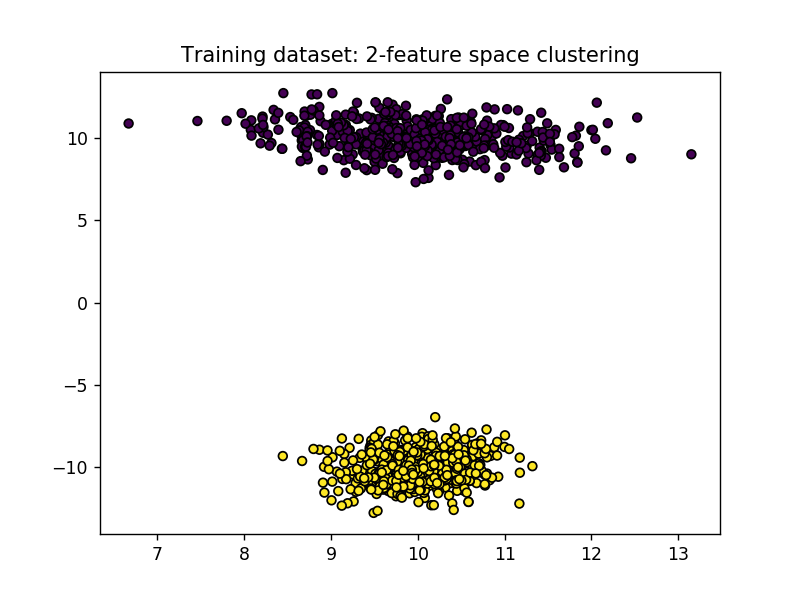

In [24]:
d = 2
n = 1000
difficulty = 10.0 # how far apart are the clusters
X, y = make_classification(n_samples=n, n_features=d, n_redundant=0, n_informative=d,
                             n_clusters_per_class=1, class_sep=difficulty, random_state=4567)
# plot
plt.title("Training dataset: 2-feature space clustering")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

To exetuce COPAC algorithm, we have to define following parameters:

- k : int
        Size of local neighborhood for local correlation dimensionality.
        The paper suggests k >= 3 * n_features.
- mu : int
        Minimum number of points in a cluster with mu <= k.
- eps : float
        Neighborhood predicate, so that neighbors are closer than `eps`.

Below, the parameters for this evaluation are defined.

In [25]:
k = 6
mu = 6
eps = 2
alpha = 0.85

### Our implementation of COPAC

Let's see how our implementation of COPAC algorithm will solve the introduced clustering problem.

<IPython.core.display.Javascript object>


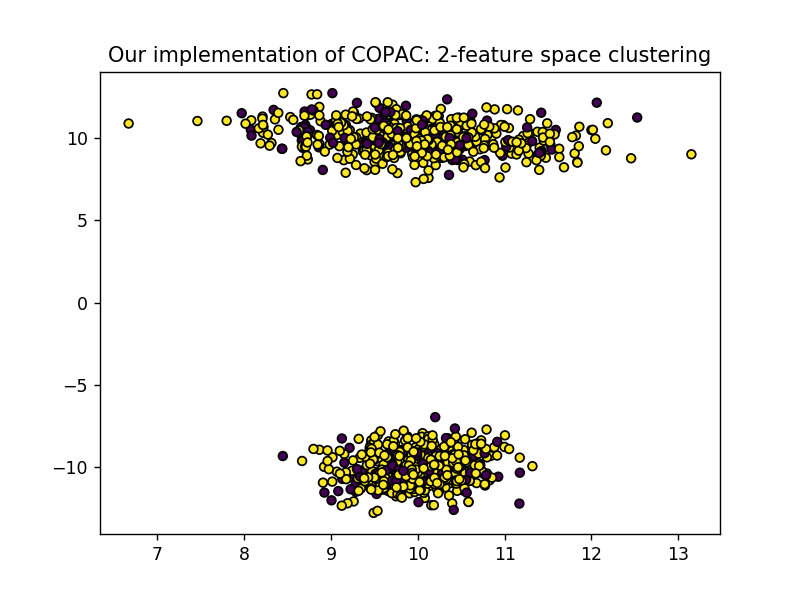

In [26]:
clst = COPAC(k=k, mu=mu, eps=eps, alpha=alpha, algorithm='auto')
y_our = clst.fit_predict(X)
# plot
plt.close()
plt.title("Our implementation of COPAC: 2-feature space clustering")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y_our, s=25, edgecolor='k')
plt.show()

Even though clusters are clearly separated, the COPAC could not distinguish between the them.

In [27]:
print('AMI', adjusted_mutual_info_score(y, y_our))
print('NMI', normalized_mutual_info_score(y, y_our))
print('V  ', v_measure_score(y, y_our))

AMI 9.16686386878e-05
NMI 0.000951205403924
V   0.000939924036594


All three measures prove that the clustering is more or less random and that the algorithm failed.

### ELKI implementation of COPAC

Next, we discover how successful the ELKI implementation will be.

<IPython.core.display.Javascript object>


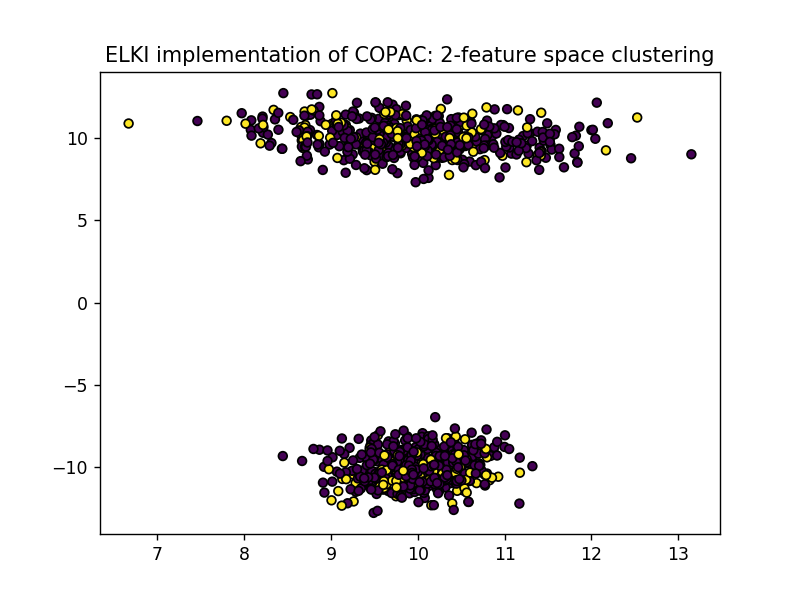

In [28]:
y_elki = elki_copac(X, k=k, mu=mu, eps=eps, alpha=alpha)
# plot
plt.close()
plt.title("ELKI implementation of COPAC: 2-feature space clustering")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y_elki, s=25, edgecolor='k')
plt.show()

In [7]:
print('AMI', adjusted_mutual_info_score(y, y_elki))
print('NMI', normalized_mutual_info_score(y, y_elki))
print('V  ', v_measure_score(y, y_elki))

AMI -0.000714896194597
NMI 9.98097611376e-06
V   9.88949841691e-06


Both scatter plot and measures indicate bad behaviour of the ELKI implementation as well. This suggests that the inability to retrieve reasonable clusters from the given artificial data is rather due to limitations of the algorithm than due to implementation errors. To conclude, let's see the mutual correspondence of the two implementations.

### Mutual correspondence 

In [29]:
print('AMI', adjusted_mutual_info_score(y_our, y_elki))
print('NMI', normalized_mutual_info_score(y_our, y_elki))
print('V  ', v_measure_score(y_our, y_elki))

AMI 0.084173289056
NMI 0.0866639243087
V   0.0866484963064


The mutual agreement is cca 8%, which is not much, but still higher than the correspondance to the true lables. While the individual clustering indices are at chance level for both implementations, their results compare to each other at levels above chance. This brings us to the conclusion that the algorithm on the given dataset, and both implementations fail in a similar way.

## 2. Three feature space

Now, we create an artificial dataset of two clusters in 3D space.

<IPython.core.display.Javascript object>


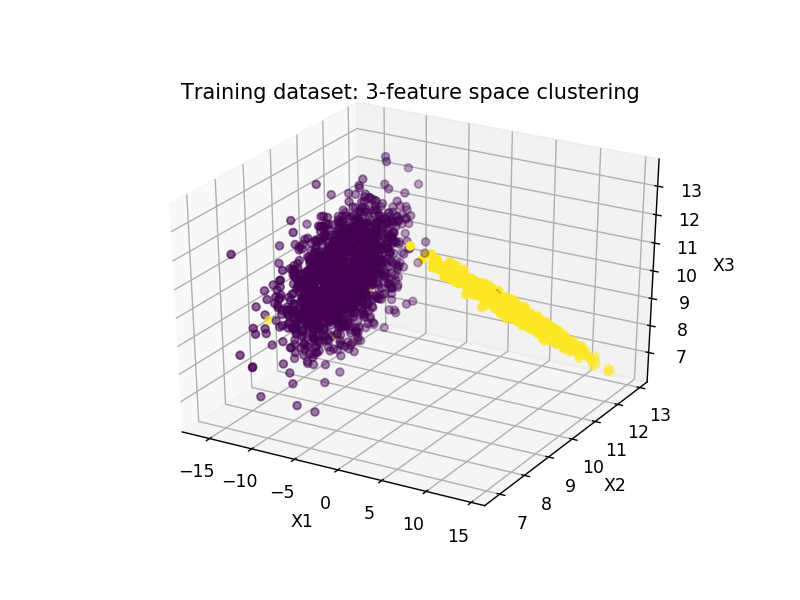

In [30]:
d = 3
n = 3000
difficulty = 10.0
X, y = make_classification(n_samples=n, n_features=d, n_redundant=0, n_informative=d,
                             n_clusters_per_class=1, class_sep=difficulty, random_state=4567)

def plot3D(X, y, title):
    plt.close()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title(title)
    plt.show()

# plot
plot3D(X, y,"Training dataset: 3-feature space clustering")

We will change the parameters for the 3D space, because we increased number of data points and the distances are getting larger due to curse of dimensionality.

In [31]:
k = 10
mu = 10
eps = 2
alpha = 0.85

### Our implementation of COPAC

<IPython.core.display.Javascript object>


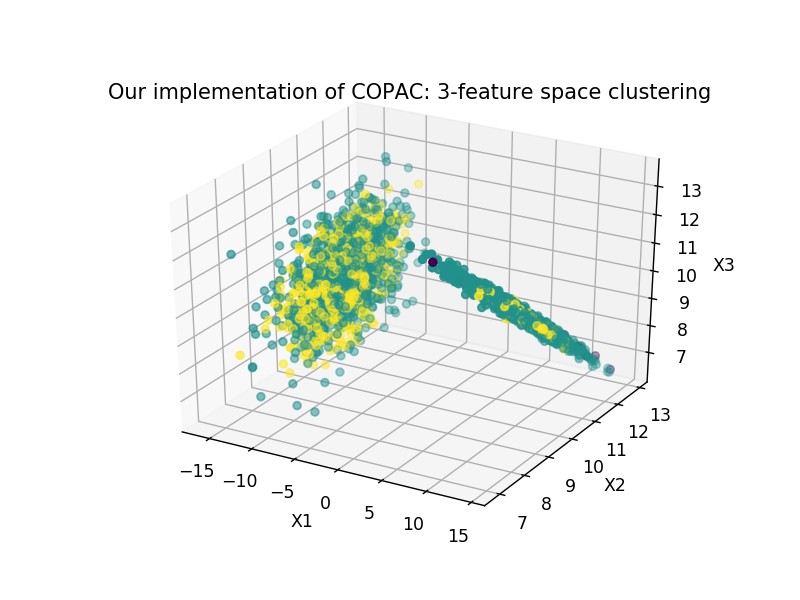

In [32]:
clst = COPAC(k=k, mu=mu, eps=eps, alpha=alpha, algorithm='auto')
y_our = clst.fit_predict(X)
# plot
plot3D(X, y_our, "Our implementation of COPAC: 3-feature space clustering")

In [12]:
print('AMI', adjusted_mutual_info_score(y, y_our))
print('NMI', normalized_mutual_info_score(y, y_our))
print('V  ', v_measure_score(y, y_our))

AMI 0.0171739263687
NMI 0.0180899765422
V   0.0180847681262


The mutual information score increased to 3% in comparison to 2D space, but the results are still very bad.

### ELKI implementation of COPAC

<IPython.core.display.Javascript object>


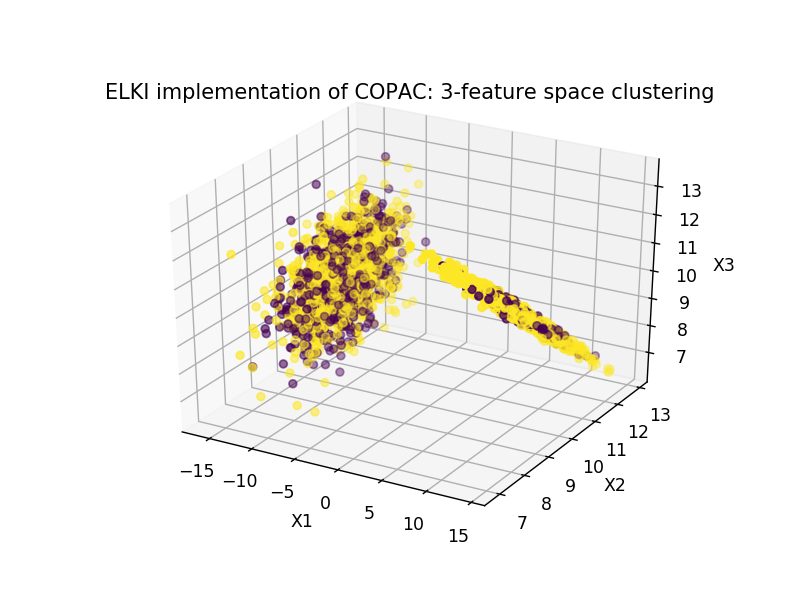

In [33]:
y_elki = elki_copac(X, k=k, mu=mu, eps=eps, alpha=alpha)
# plot
plot3D(X, y_elki, "ELKI implementation of COPAC: 3-feature space clustering")

In [14]:
print('AMI', adjusted_mutual_info_score(y, y_elki))
print('NMI', normalized_mutual_info_score(y, y_elki))
print('V  ', v_measure_score(y, y_elki))

AMI 0.00884281462199
NMI 0.00951019758328
V   0.00950007919368


The ELKI implementation produced very similar results. Here, our implementation was even a bit better.


In [34]:
print('AMI', adjusted_mutual_info_score(y_our, y_elki))
print('NMI', normalized_mutual_info_score(y_our, y_elki))
print('V  ', v_measure_score(y_our, y_elki))

AMI 0.232560832962
NMI 0.238182179358
V   0.2381237613


## 3. Ten feature space

Now, let's increase feature space to 10 dimensions. We will not be able to visualize the results by scatter plot, therefore, we will present them by parallel coordinates.

<IPython.core.display.Javascript object>


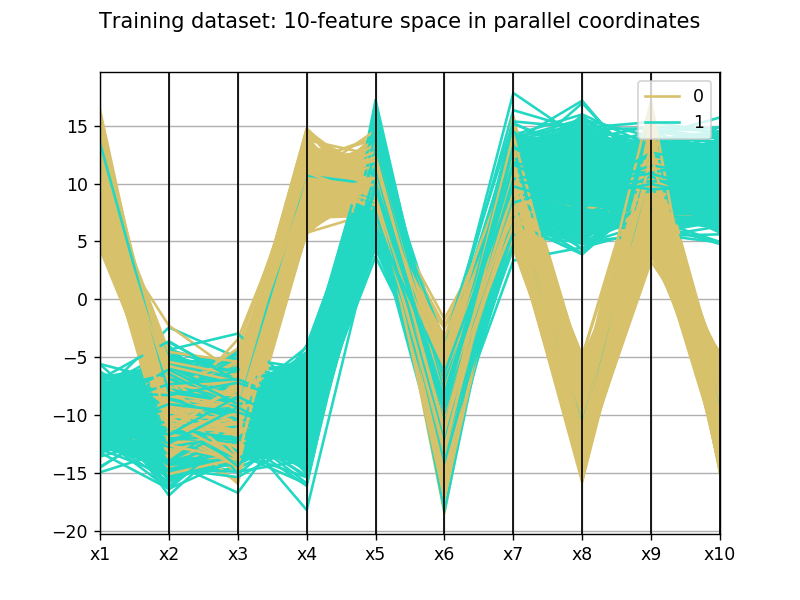

In [35]:
d = 10
n = 3000
difficulty = 10.0
X, y = make_classification(n_samples=n, n_features=d, n_redundant=0, n_informative=d,
                             n_clusters_per_class=1, class_sep=difficulty, random_state=4567)

# plot parallel coordinates
def parallel_coord(X, y, title=""):
    plt.close()
    df = pd.DataFrame(X, columns=['x' + str(i+1) for i in range(d)])
    X_df = df.copy()
    Xy_df = df.copy()
    Xy_df['y'] = y
    parallel_coordinates(Xy_df, "y")
    plt.suptitle(title)
    plt.show()
    
# plot
parallel_coord(X, y, title='Training dataset: 10-feature space in parallel coordinates')

We can see that the clusters are defined by the features x1, x4, x8 and x10. Other features does not divide the data points into clusters.

Let's set parameters of COPAC algorithm for the 10-feature space clustering:

In [36]:
k = 30
mu = 30
eps = 10
alpha = 0.85

### Our implementation of COPAC

<IPython.core.display.Javascript object>


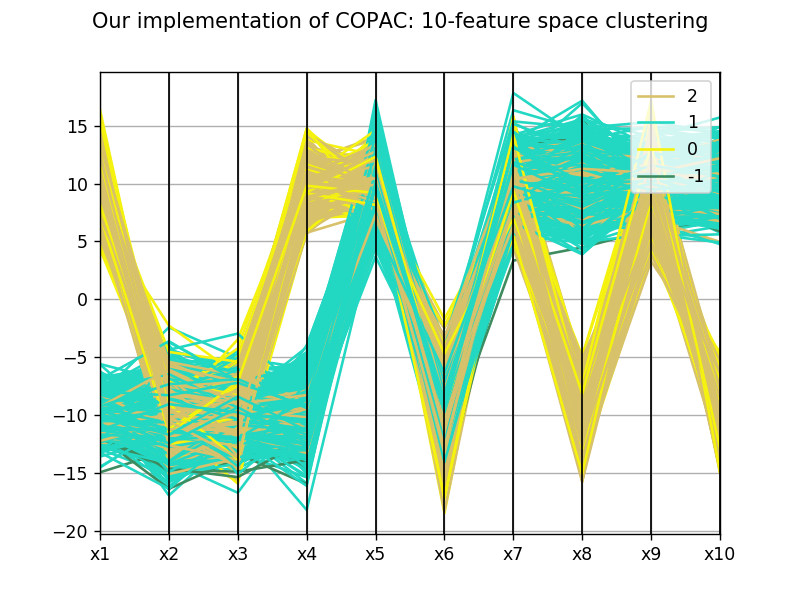

In [37]:
clst = COPAC(k=k, mu=mu, eps=eps, alpha=alpha, algorithm='auto')
y_our = clst.fit_predict(X)
# plot
parallel_coord(X, y_our, "Our implementation of COPAC: 10-feature space clustering")

We can see rapid improvement. The points are separated by colour at the crucial features.

In [38]:
print('AMI', adjusted_mutual_info_score(y, y_our))
print('NMI', normalized_mutual_info_score(y, y_our))
print('V  ', v_measure_score(y, y_our))

AMI 0.433584185508
NMI 0.503581226319
V   0.498046400847


The mutual score proves that the improvement is significant. As we increased dimnesions from 3 to 10, we saw an increase of the mutual info score from 3% to 50%.

### ELKI implementation of COPAC

<IPython.core.display.Javascript object>


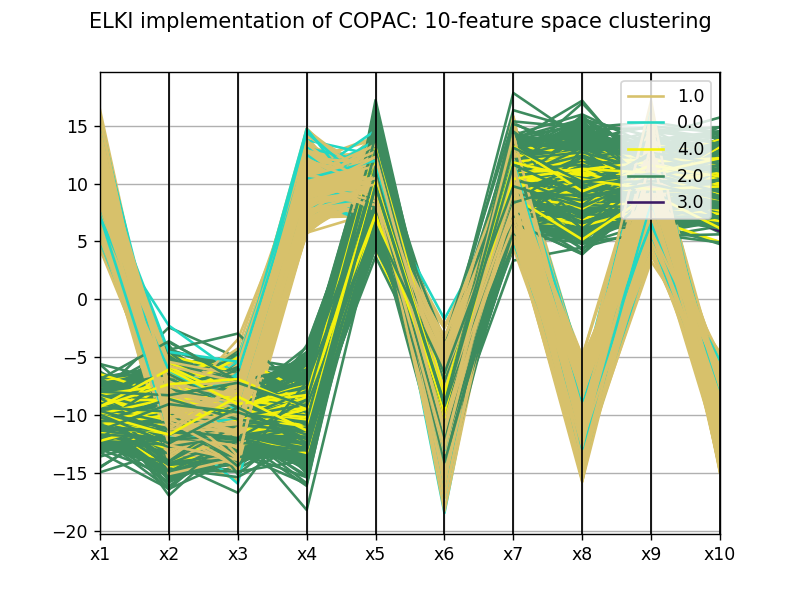

In [39]:
y_elki = elki_copac(X, k=k, mu=mu, eps=eps, alpha=alpha)
# plot
parallel_coord(X, y_elki, "ELKI implementation of COPAC: 10-feature space clustering")

In [21]:
print('AMI', adjusted_mutual_info_score(y, y_elki))
print('NMI', normalized_mutual_info_score(y, y_elki))
print('V  ', v_measure_score(y, y_elki))

AMI 0.563327339232
NMI 0.726354715641
V   0.703587673045


ELKI implementation found somewhat more clusters, however, the results are significantly better than in the case of our implementation.

### Mutual correspondence 

In [40]:
print('AMI', adjusted_mutual_info_score(y_our, y_elki))
print('NMI', normalized_mutual_info_score(y_our, y_elki))
print('V  ', v_measure_score(y_our, y_elki))

AMI 0.553271068905
NMI 0.615223114828
V   0.611862060595


Both implementations produced similar results and their mutual correspondence is high. We can conclude, that the COPAC algorithm behaves better in high dimensional spaces.